<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 90px">

# LCS 2020 Spring Analysis Notebook

#### (updated May 15)
#### _source: http://oracleselixir.com/_


###### _data dictionary: https://oracleselixir.com/matchdata/match-data-dictionary/_

In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
pd.options.display.max_columns = 100
pd.options.display.max_rows = 3000

In [77]:
df = pd.read_csv('../datasets/2020_spring_match.csv')
df.head()

,gameid,url,league,split,date,game,patch,playerid,side,position,player,team,champion,ban1,ban2,ban3,ban4,ban5,gamelength,result,kills,deaths,assists,teamkills,teamdeaths,doublekills,triplekills,quadrakills,pentakills,firstblood,firstbloodkill,firstbloodassist,firstbloodvictim,team kpm,ckpm,firstdragon,dragons,opp_dragons,elementaldrakes,opp_elementaldrakes,infernals,mountains,clouds,oceans,dragons (type unknown),elders,opp_elders,heralds,opp_heralds,firstbaron,barons,opp_barons,firsttower,towers,opp_towers,firstmidtower,firsttothreetowers,inhibitors,opp_inhibitors,damagetochampions,dpm,damageshare,wardsplaced,wpm,wardskilled,wcpm,controlwardsbought,visionscore,vspm,totalgold,earnedgold,earned gpm,earnedgoldshare,goldspent,gspd,total cs,minionkills,monsterkills,monsterkillsownjungle,monsterkillsenemyjungle,cspm,goldat10,xpat10,csat10,opp_goldat10,opp_xpat10,opp_csat10,golddiffat10,xpdiffat10,csdiffat10,goldat15,xpat15,csat15,opp_goldat15,opp_xpat15,opp_csat15,golddiffat15,xpdiffat15,csdiffat15
0,5655-7249,http://lol.qq.com/match/match_data.shtml?bmid=...,LPL,2020-1,2020-01-13 09:22:22,1,10.01,1,Blue,top,TheShy,Invictus Gaming,Aatrox,Pantheon,Nautilus,Elise,Gangplank,Mordekaiser,2640,1,11,6,13,28,29,NaN,NaN,0.0,0.0,NaN,0.0,NaN,NaN,0.6364,1.2955,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42830.0,973.4091,0.297061,17.0,0.3864,7.0,0.1591,2.0,NaN,NaN,20569,14908,338.8182,0.275458,NaN,NaN,299.0,276.0,23.0,14.0,0.0,6.7955,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5655-7249,http://lol.qq.com/match/match_data.shtml?bmid=...,LPL,2020-1,2020-01-13 09:22:22,1,10.01,2,Blue,jng,Ning,Invictus Gaming,Qiyana,Pantheon,Nautilus,Elise,Gangplank,Mordekaiser,2640,1,0,7,11,28,29,NaN,NaN,0.0,0.0,NaN,0.0,NaN,NaN,0.6364,1.2955,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9984.0,226.9091,0.069247,66.0,1.5000,43.0,0.9773,15.0,NaN,NaN,13988,8327,189.2500,0.153858,NaN,NaN,285.0,83.0,202.0,134.0,16.0,6.4773,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5655-7249,http://lol.qq.com/match/match_data.shtml?bmid=...,LPL,2020-1,2020-01-13 09:22:22,1,10.01,3,Blue,mid,Rookie,Invictus Gaming,Rumble,Pantheon,Nautilus,Elise,Gangplank,Mordekaiser,2640,1,7,8,13,28,29,NaN,NaN,0.0,0.0,NaN,0.0,NaN,NaN,0.6364,1.2955,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38663.0,878.7045,0.268160,13.0,0.2955,8.0,0.1818,10.0,NaN,NaN,16447,10786,245.1364,0.199294,NaN,NaN,273.0,246.0,27.0,19.0,0.0,6.2045,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5655-7249,http://lol.qq.com/match/match_data.shtml?bmid=...,LPL,2020-1,2020-01-13 09:22:22,1,10.01,4,Blue,bot,Puff,Invictus Gaming,Senna,Pantheon,Nautilus,Elise,Gangplank,Mordekaiser,2640,1,8,3,17,28,29,NaN,NaN,0.0,0.0,NaN,0.0,NaN,NaN,0.6364,1.2955,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42401.0,963.6591,0.294086,12.0,0.2727,19.0,0.4318,3.0,NaN,NaN,20479,14818,336.7727,0.273795,NaN,NaN,343.0,319.0,24.0,19.0,2.0,7.7955,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5655-7249,http://lol.qq.com/match/match_data.shtml?bmid=...,LPL,2020-1,2020-01-13 09:22:22,1,10.01,5,Blue,sup,Southwind,Invictus Gaming,Braum,Pantheon,Nautilus,Elise,Gangplank,Mordekaiser,2640,1,2,5,21,28,29,NaN,NaN,0.0,0.0,NaN,0.0,NaN,NaN,0.6364,1.2955,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10301.0,234.1136,0.071446,70.0,1.5909,11.0,0.2500,21.0,NaN,NaN,10943,5282,120.0455,0.097594,NaN,NaN,37.0,37.0,0.0,0.0,0.0,0.8409,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [78]:
df.shape

(15312, 99)

In [79]:
# Renaming Columns >>>

new_columns_dict = {
    'gameid': 'game_id_l',  
    'url': 'url_l',
    'league': 'league_l',
    'split': 'split_l',
    'date': 'date_t',
    'game': 'game_l',
    'patch': 'patch_l',
    'playerid': 'player_id_l',
    'side': 'map_side_b',
    'position': 'map_position_c', 
    'player': 'player_name_l', 
    'team': 'team_name_l', 
    'champion': 'player_champ_c', 
    'ban1': 'team_ban1_c', 
    'ban2': 'team_ban2_c',
    'ban3': 'team_ban3_c', 
    'ban4': 'team_ban4_c', 
    'ban5': 'team_ban5_c', 
    'gamelength': 'game_seconds_n', 
    'result': 'result_b', 
    'kills': 'player_kills_n', 
    'deaths': 'player_deaths_n',
    'assists': 'player_assists_n', 
    'teamkills': 'team_kills_n', 
    'teamdeaths': 'team_deaths_n', 
    'doublekills': 'double_kills_n', 
    'triplekills': 'triple_kills_n',
    'quadrakills': 'quadra_kills_n', 
    'pentakills': 'penta_kills_n', 
    'firstblood': 'first_blood_b',  
    'firstbloodkill': 'first_blood_kill_b',
    'firstbloodassist': 'got_fb_assist_b', 
    'firstbloodvictim': 'was_fb_victim_b', 
    'team kpm': 'team_kpm_n', 
    'ckpm': 'combined_kpm_n',
    'firstdragon': 'first_dragon_b', 
    'dragons': 'dragons_n', 
    'opp_dragons': 'opponent_dragons_n', 
    'elementaldrakes': 'ele_drakes_n',
    'opp_elementaldrakes': 'opp_ele_drakes_n', 
    'infernals': 'infernal_drakes_n', 
    'mountains': 'mountain_drakes_n', 
    'clouds': 'cloud_drakes_n', 
    'oceans': 'ocean_drakes_n',
    'dragons (type unknown)': 'unknown_dragons_n', 
    'elders': 'elder_dragons_n', 
    'opp_elders': 'opp_elder_dragons_n',
    'heralds': 'heralds_n',
    'opp_heralds': 'opp_heralds_n', 
    'firstbaron': 'first_baron_b', 
    'barons': 'barons_n', 
    'opp_barons': 'opp_barons_n', 
    'firsttower': 'first_tower_b',
    'towers': 'towers_n', 
    'opp_towers': 'opp_towers_n',
    'firstmidtower': 'first_midtower_b', 
    'firsttothreetowers': 'first_to_3towers_b',
    'inhibitors': 'inhibitors_n',
    'opp_inhibitors': 'opp_inhibitors_n', 
    'damagetochampions': 'damage_to_champs_n', 
    'dpm': 'damage_per_min_n',
    'damageshare': 'damage_share_n', # As %.
    'wardsplaced': 'wards_placed_n', 
    'wpm': 'wards_per_min_n', 
    'wardskilled': 'wards_destroyed_n', 
    'wcpm': 'wards_cleared_per_min_n',
    'controlwardsbought': 'control_wards_bought_n', 
    'visionscore': 'total_vision_score_n',
    'vspm': 'vision_score_per_min_n', 
    'totalgold': 'total_gold_n', 
    'earnedgold': 'gold_earned_n',
    'earned gpm': 'gold_per_min_n', 
    'earnedgoldshare': 'gold_share_n', # Share of team’s total gold, with starting gold and inherent gold generation removed.
    'goldspent': 'gold_spent_n', 
    'gspd': 'gold_spend_%_dif_n', # (Team A Gold Spent - Team B Gold Spent) / (Gold Spent Average for both) >>> see: https://oracleselixir.com/2015/07/measuring-the-margins-gold-spent-percentage-difference/.
    'total cs': 'total_creep_score_n', # All creep score variables include minions and monsters, and do not include wards, champion-generated minions, or other units counted as CS in-game.
    'minionkills': 'lane_minions_killed_n', 
    'monsterkills': 'monsters_killed_n', 
    'monsterkillsownjungle': 'own_jungle_monsters_n',
    'monsterkillsenemyjungle': 'opp_jungle_monsters_n', 
    'cspm': 'creep_score_per_min_n', 
    'goldat10': 'gold_at_10min_n', 
    'xpat10': 'exp_at_10min_n', 
    'csat10': 'creep_score_at_10min_n',
    'opp_goldat10': 'opp_gold_at_10min_n', 
    'opp_xpat10': 'opp_exp_at_10min_n', 
    'opp_csat10': 'opp_creep_score_at_10min_n', 
    'golddiffat10': 'gold_diff_at_10min_n',
    'xpdiffat10': 'exp_diff_at_10min_n', 
    'csdiffat10': 'creep_score_diff_at_10min_n', 
    'goldat15': 'gold_at_15min_n', 
    'xpat15': 'exp_at_15min_n',
    'csat15': 'creep_score_at_15min_n',
    'opp_goldat15': 'opp_gold_at_15min_n',
    'opp_xpat15': 'opp_exp_at_15min_n', 
    'opp_csat15': 'opp_creep_score_at_15min_n', 
    'golddiffat15': 'gold_diff_at_15min_n',
    'xpdiffat15': 'exp_diff_at_15min_n', 
    'csdiffat15': 'creep_score_diff_at_15min_n'}

df.rename(columns=new_columns_dict, inplace=True)

# Legend: 
    # _l > Label(game)/ Record Identifier
    # _c > category/ class
    # _t > time/ Time Identifier
    # _n > number/ sample
    # _b > binary/ (yes|no)

In [80]:
print(df.dtypes[0:20])
print(df.dtypes[21:40])
print(df.dtypes[41:60])
print(df.dtypes[61:80])
print(df.dtypes[81:100])

game_id_l          object
url_l              object
league_l           object
split_l            object
date_t             object
game_l              int64
patch_l           float64
player_id_l         int64
map_side_b         object
map_position_c     object
player_name_l      object
team_name_l        object
player_champ_c     object
team_ban1_c        object
team_ban2_c        object
team_ban3_c        object
team_ban4_c        object
team_ban5_c        object
game_seconds_n      int64
result_b            int64
dtype: object
player_deaths_n         int64
player_assists_n        int64
team_kills_n            int64
team_deaths_n           int64
double_kills_n        float64
triple_kills_n        float64
quadra_kills_n        float64
penta_kills_n         float64
first_blood_b         float64
first_blood_kill_b    float64
got_fb_assist_b       float64
was_fb_victim_b       float64
team_kpm_n            float64
combined_kpm_n        float64
first_dragon_b        float64
dragons_n       

In [81]:
# Change date to date/time. 
df['date_t'] = pd.to_datetime(df['date_t'])

In [82]:
# Fill or drop nulls >>>

# Some player names are missing, probably because tim was unable to find the name of these players, but since we need those numerical columns, we will keep them and fill the categorical columns with "missing."
df['player_name_l'] = df['player_name_l'].fillna('missing')
df['player_champ_c'] = df['player_champ_c'].fillna('missing')
df['team_ban1_c'] = df['team_ban1_c'].fillna('missing')
df['team_ban2_c'] = df['team_ban2_c'].fillna('missing')
df['team_ban3_c'] = df['team_ban3_c'].fillna('missing')
df['team_ban4_c'] = df['team_ban4_c'].fillna('missing')
df['team_ban5_c'] = df['team_ban5_c'].fillna('missing')

df['double_kills_n'] = df['double_kills_n'].fillna(-1)
df['triple_kills_n'] = df['triple_kills_n'].fillna(-1)
df['quadra_kills_n'] = df['quadra_kills_n'].fillna(-1)
df['penta_kills_n'] = df['penta_kills_n'].fillna(-1)
df['total_vision_score_n'] = df['total_vision_score_n'].fillna(-1)
df = df.fillna(0)

In [83]:
# Export clean dataset >>>
df.to_csv('../datasets/master_df.csv', index=False)

# General EDA  

In [84]:
# Switch to master_df >>>
df = pd.read_csv('../datasets/master_df.csv')

## EDA & Categorical Fields:

**Engineered Columns:**
- player_dmg_score_s => Ranked based on damage to opposing champions. 
- champ_success_score_s => Ranked from least to most 'winning' champion regardless of team. 
- player_deaths_score_s => Ranked based on player deaths as compared to average. 
    Every player should strive to not die! 
- combo_kill_score_s => Combination score consisting of double, triple, quadra and penta kills. Applying more weight to players with out standing team play capabilities, like participating in multiple penta kills. 
    NaNs are turned into zeros since no participation credit was received from that player.     
    Otherwise, 1 point of participation given even if the combo was not theirs. 
- position_weight_s => -5 for bot(ADC), -4 for mid, -3 for top, -2 for jng, +1 for sup. 
    Hoping to provide counter weight for support players. 
- assists_weight_s => Ranked based on assists, hoping to provide counter weight for support players. 
- player_vision_score_s => Ranked based on players warding ability. 
- player_gold_score_s => Ranked based on players gold earnings as compared to average. 
- blue_side_advantage => .4% 

In [85]:
# Set up player_dmg_score_s >>>
df['player_dmg_score_s'] = df['damage_to_champs_n'].apply(lambda x: 5 if x >= 17_000 else (4 if x >= 14_000 else (3 if x >= 11_000 else (2 if x >= 7_000 else 1))))

# Set up champ_success_score_s >>>
df['champ_success_score_s'] = df['player_champ_c'].map({'Miss Fortune': 304,
                                                        'Aphelios': 259,
                                                        'Ornn': 238,
                                                        'Nautilus': 234,
                                                        'Aatrox': 232,
                                                        'Sett': 228,
                                                        'Jarvan IV': 202,
                                                        'Varus': 200,
                                                        'Braum': 180,
                                                        'Thresh': 180,
                                                        'Lee Sin': 161,
                                                        'Zoe': 159,
                                                        'Renekton': 156,
                                                        'Tahm Kench': 154,
                                                        'Syndra': 149,
                                                        'Azir': 145,
                                                        'Trundle': 141,
                                                        'Rek\'Sai': 133,
                                                        'Senna': 131,
                                                        'Gragas': 129,
                                                        'Kalista': 127,
                                                        'LeBlanc': 114,
                                                        'Elise': 112,
                                                        'Sejuani': 109,
                                                        'Ezreal': 107,
                                                        'Olaf': 105,
                                                        'Rakan': 97,
                                                        'Rumble': 96,
                                                        'Taric': 90,
                                                        'Leona': 85,
                                                        'Mordekaiser': 83,
                                                        'Gangplank': 72,
                                                        'Sylas': 71,
                                                        'Pantheon': 67,
                                                        'Xayah': 59,
                                                        'Yuumi': 57,
                                                        'Corki': 55,
                                                        'Qiyana': 49,
                                                        'Cassiopeia': 45,
                                                        'Lucian': 40,
                                                        'Irelia': 39,
                                                        'Ekko': 38,
                                                        'Jayce': 38,
                                                        'Kai\'Sa': 36,
                                                        'Bard': 34,
                                                        'Maokai': 33,
                                                        'Galio': 33,
                                                        'Akali': 33,
                                                        'Kassadin': 32,
                                                        'Orianna': 31,
                                                        'Kennen': 31,
                                                        'Viktor': 27,
                                                        'Blitzcrank': 26,
                                                        'Wukong': 25,
                                                        'Graves': 24,
                                                        'Camille': 24,
                                                        'Kindred': 24,
                                                        'Morgana': 23,
                                                        'Ryze': 22,
                                                        'Karma': 22,
                                                        'Lissandra': 21,
                                                        'Diana': 21,
                                                        'Vladimir': 21,
                                                        'Alistar': 18,
                                                        'Soraka': 18,
                                                        'Karthus': 18,
                                                        'Neeko': 17,
                                                        'Zilean': 16,
                                                        'Taliyah': 16,
                                                        'Ziggs': 15,
                                                        'Tristana': 13,
                                                        'Fiora': 13,
                                                        'Yasuo': 12,
                                                        'Zac': 12,
                                                        'Poppy': 11,
                                                        'Caitlyn': 10,
                                                        'Nocturne': 10,
                                                        'Gnar': 9,
                                                        'Nidalee': 9,
                                                        'Vayne': 8,
                                                        'Ashe': 8,
                                                        'Volibear': 8,
                                                        'Lulu': 8,
                                                        'Kled': 8,
                                                        'Malphite': 8,
                                                        'Pyke': 8,
                                                        'Janna': 7,
                                                        'Vel\'koz': 6,
                                                        'Jax': 5,
                                                        'Urgot': 5,
                                                        'Jinx': 4,
                                                        'Cho\'gath': 4,
                                                        'Veigar': 4,
                                                        'Kayle': 4,
                                                        'Shen': 4,
                                                        'Quinn': 4,
                                                        'Jhin': 3,
                                                        'Sion': 3,
                                                        'Twisted Fate': 3,
                                                        'Aurelion Sol': 3,
                                                        'Xin Zhao': 3,
                                                        'Hecarim': 3,
                                                        'Kog\'Maw': 3,
                                                        'Riven': 3,
                                                        'Swain': 2,
                                                        'Illaoi': 2,
                                                        'Zed': 2,
                                                        'Heimerdinger': 2,
                                                        'Malzahar': 2,
                                                        'Shyvana': 2,
                                                        'Draven': 2,
                                                        'Darius': 1,
                                                        'Yorick': 1,
                                                        'Shaco': 1,
                                                        'Tryndamere': 1,
                                                        'Kha\'zix': 1,
                                                        'Garen': 1,
                                                        'Rengar': 1,
                                                        'Singed': 1,
                                                        'Sivir': 1,
                                                        'Ivern': 1,
                                                        'Ahri': 1,
                                                        'Nami': 1,
                                                        'Anivia': 1,
                                                        'Annie': 1,
                                                        'Skarner': 1,
                                                        'Teemo': 1,
                                                        'Sona': 1,
                                                        'Lux': 1,
                                                        'Brand': 1,
                                                        'Nunu': 1,
                                                        'Twitch': 1,
                                                        'Evelynn': 1,
                                                        'Talon': 1,
                                                        'missing': 0
                                                       })
champ_weights = 0.01   # Set overall weight here. 
df['champ_success_score_s'] = df['champ_success_score_s'] * champ_weights
df['champ_success_score_s'].fillna(0)

# Set up player_deaths_score_s >>> 
df['player_deaths_score_s'] = df['player_deaths_n'].apply(lambda x: 5 if x == 0 else (4 if x <= 1 else (3 if x <= 2 else (2 if x <= 5 else 1))))

# Set up combo_kill_score_s >>>
df['double_kills_n'] = df['double_kills_n'].apply(lambda x: 0 if x == -1 else (1 if x == 0 else (2 if x == 1 else 3)))
df['triple_kills_n'] = df['triple_kills_n'].apply(lambda x: 0 if x == -1 else (1 if x == 0 else (3 if x == 1 else 4)))
df['quadra_kills_n'] = df['quadra_kills_n'].apply(lambda x: 0 if x == -1 else (1 if x == 0 else (4 if x == 1 else 5)))
df['penta_kills_n'] = df['penta_kills_n'].apply(lambda x: 0 if x == -1 else (1 if x == 0 else (5 if x == 1 else 6)))

df['combo_kill_score_s'] = df['double_kills_n'] + df['triple_kills_n'] + df['quadra_kills_n'] + df['penta_kills_n']

# Set up position_weight_s >>>
df['position_weight_s'] = df['map_position_c'].apply(lambda x: -5 if x == 'bot' else (-4 if x == 'mid' else (-3 if x == 'top' else (-2 if x == 'jng' else +1))))

# Set up assists_weight_s >>>
df['assists_weight_s'] = df['player_assists_n'].apply(lambda x: 5 if x >= 50 else (4 if x >= 40 else (3 if x >= 30 else (2 if x >= 10 else 1))))

# Set up player_vision_score_s >>>
df['player_vision_score_s'] = df['total_vision_score_n'].apply(lambda x: 5 if x >= 400 else (4 if x >= 300 else (3 if x >= 200 else (2 if x >= 100 else 1))))

# Set up player_gold_score_s >>>
df['player_gold_score_s'] = df['gold_earned_n'].apply(lambda x: 5 if x >= 12_000 else (4 if x >= 10_000 else (3 if x >= 8_000 else (2 if x >= 6_000 else 1))))

# Set up blue_side_advantage >>>
df['blue_side_advantage'] = df['map_side_b'].apply(lambda x: -0.4 if x == 'Blue' else 0)

# Final Player Score >>>
df['final_score_s'] = df['player_dmg_score_s']+df['champ_success_score_s']+df['player_deaths_score_s']+df['combo_kill_score_s']+df['position_weight_s']+df['assists_weight_s']+df['player_vision_score_s']+df['player_gold_score_s']+df['blue_side_advantage']

In [87]:
df.groupby('player_name_l')['final_score_s'].mean().sort_values(ascending=False).round(1).head(10)

player_name_l
missing     21.3
Teddy       15.9
Feiz        15.9
Zven        15.8
K1ng        15.8
Ruler       15.7
Unified     15.4
HyBriD      15.4
Licorice    15.3
Upset       15.2
Name: final_score_s, dtype: float64

In [88]:
df.groupby('player_name_l')['final_score_s'].sum().sort_values(ascending=False).round(1).head(10)

player_name_l
missing    54439.6
Deft         824.1
Teddy        811.6
Chovy        795.7
Keria        769.8
Aiming       742.5
Ruler        739.9
Faker        721.9
Effort       718.1
Nuguri       715.0
Name: final_score_s, dtype: float64

In [89]:
df.groupby('team_name_l')['final_score_s'].mean().round(2).sort_values(ascending=False).head(10)

team_name_l
Cloud9              16.51
Team Dynamics       16.44
Cloud9 Academy      16.18
T1                  16.03
Dignitas Academy    15.89
Gen.G               15.85
G2 Esports          15.75
Talon Esports       15.73
Origen              15.71
Machi Esports       15.66
Name: final_score_s, dtype: float64

In [90]:
df.groupby('team_name_l')['final_score_s'].sum().sort_values(ascending=False).head(10)

team_name_l
DragonX                5147.91
T1                     4904.64
DAMWON Gaming          4613.86
SANDBOX Gaming         4518.34
Gen.G                  4470.83
KT Rolster             4387.55
Griffin                4303.22
Afreeca Freecs         4042.67
Hanwha Life Esports    3838.58
APK Prince             3807.86
Name: final_score_s, dtype: float64

In [91]:
df.groupby('player_name_l')['result_b'].sum().sort_values(ascending=False).head(10)

player_name_l
missing    1276
Effort       36
Faker        36
Teddy        36
Pyosik       35
Chovy        35
Deft         35
Keria        35
Canna        34
Doinb        33
Name: result_b, dtype: int64

In [92]:
df.groupby('team_name_l')['result_b'].sum().sort_values(ascending=False).head(10)

team_name_l
T1                 216
DragonX            210
FunPlus Phoenix    198
JD Gaming          192
Gen.G              186
Top Esports        186
Invictus Gaming    174
Cloud9             156
G2 Esports         156
DAMWON Gaming      156
Name: result_b, dtype: int64

In [93]:
df[['final_score_s', 'player_name_l', 'map_position_c', 'player_dmg_score_s', 'champ_success_score_s', 'player_deaths_score_s', 'combo_kill_score_s', 'position_weight_s', 'assists_weight_s', 'player_vision_score_s', 'player_gold_score_s']].sort_values(by='final_score_s', ascending=False).head(10)

,final_score_s,player_name_l,map_position_c,player_dmg_score_s,champ_success_score_s,player_deaths_score_s,combo_kill_score_s,position_weight_s,assists_weight_s,player_vision_score_s,player_gold_score_s
4835,38.0,missing,team,5,0.0,1,16,1,5,5,5
3299,37.0,missing,team,5,0.0,1,17,1,5,3,5
9143,37.0,missing,team,5,0.0,1,16,1,5,4,5
10282,36.6,missing,team,5,0.0,1,16,1,5,4,5
12827,36.0,missing,team,5,0.0,1,15,1,5,4,5
4378,35.6,missing,team,5,0.0,1,15,1,5,4,5
9022,35.6,missing,team,5,0.0,1,15,1,4,5,5
11842,35.6,missing,team,5,0.0,1,16,1,5,3,5
7703,35.0,missing,team,5,0.0,1,16,1,3,4,5
7043,35.0,missing,team,5,0.0,2,15,1,4,3,5


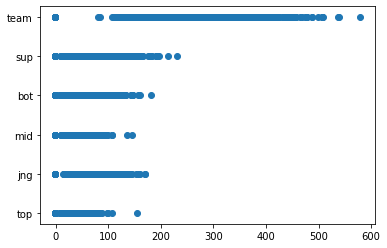

In [94]:
# Graph: 
# Player kills based on map positioning >>>
plt.scatter(df['total_vision_score_n'], df['map_position_c']);

In [95]:
df.head()

,game_id_l,url_l,league_l,split_l,date_t,game_l,patch_l,player_id_l,map_side_b,map_position_c,player_name_l,team_name_l,player_champ_c,team_ban1_c,team_ban2_c,team_ban3_c,team_ban4_c,team_ban5_c,game_seconds_n,result_b,player_kills_n,player_deaths_n,player_assists_n,team_kills_n,team_deaths_n,double_kills_n,triple_kills_n,quadra_kills_n,penta_kills_n,first_blood_b,first_blood_kill_b,got_fb_assist_b,was_fb_victim_b,team_kpm_n,combined_kpm_n,first_dragon_b,dragons_n,opponent_dragons_n,ele_drakes_n,opp_ele_drakes_n,infernal_drakes_n,mountain_drakes_n,cloud_drakes_n,ocean_drakes_n,unknown_dragons_n,elder_dragons_n,opp_elder_dragons_n,heralds_n,opp_heralds_n,first_baron_b,...,damage_to_champs_n,damage_per_min_n,damage_share_n,wards_placed_n,wards_per_min_n,wards_destroyed_n,wards_cleared_per_min_n,control_wards_bought_n,total_vision_score_n,vision_score_per_min_n,total_gold_n,gold_earned_n,gold_per_min_n,gold_share_n,gold_spent_n,gold_spend_%_dif_n,total_creep_score_n,lane_minions_killed_n,monsters_killed_n,own_jungle_monsters_n,opp_jungle_monsters_n,creep_score_per_min_n,gold_at_10min_n,exp_at_10min_n,creep_score_at_10min_n,opp_gold_at_10min_n,opp_exp_at_10min_n,opp_creep_score_at_10min_n,gold_diff_at_10min_n,exp_diff_at_10min_n,creep_score_diff_at_10min_n,gold_at_15min_n,exp_at_15min_n,creep_score_at_15min_n,opp_gold_at_15min_n,opp_exp_at_15min_n,opp_creep_score_at_15min_n,gold_diff_at_15min_n,exp_diff_at_15min_n,creep_score_diff_at_15min_n,player_dmg_score_s,champ_success_score_s,player_deaths_score_s,combo_kill_score_s,position_weight_s,assists_weight_s,player_vision_score_s,player_gold_score_s,blue_side_advantage,final_score_s
0,5655-7249,http://lol.qq.com/match/match_data.shtml?bmid=...,LPL,2020-1,2020-01-13 09:22:22,1,10.01,1,Blue,top,TheShy,Invictus Gaming,Aatrox,Pantheon,Nautilus,Elise,Gangplank,Mordekaiser,2640,1,11,6,13,28,29,0,0,1,1,0.0,0.0,0.0,0.0,0.6364,1.2955,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,42830.0,973.4091,0.297061,17.0,0.3864,7.0,0.1591,2.0,-1.0,0.0,20569,14908,338.8182,0.275458,0.0,0.0,299.0,276.0,23.0,14.0,0.0,6.7955,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5,2.32,1,2,-3,2,1,5,-0.4,14.92
1,5655-7249,http://lol.qq.com/match/match_data.shtml?bmid=...,LPL,2020-1,2020-01-13 09:22:22,1,10.01,2,Blue,jng,Ning,Invictus Gaming,Qiyana,Pantheon,Nautilus,Elise,Gangplank,Mordekaiser,2640,1,0,7,11,28,29,0,0,1,1,0.0,0.0,0.0,0.0,0.6364,1.2955,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,9984.0,226.9091,0.069247,66.0,1.5000,43.0,0.9773,15.0,-1.0,0.0,13988,8327,189.2500,0.153858,0.0,0.0,285.0,83.0,202.0,134.0,16.0,6.4773,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,0.49,1,2,-2,2,1,3,-0.4,9.09
2,5655-7249,http://lol.qq.com/match/match_data.shtml?bmid=...,LPL,2020-1,2020-01-13 09:22:22,1,10.01,3,Blue,mid,Rookie,Invictus Gaming,Rumble,Pantheon,Nautilus,Elise,Gangplank,Mordekaiser,2640,1,7,8,13,28,29,0,0,1,1,0.0,0.0,0.0,0.0,0.6364,1.2955,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,38663.0,878.7045,0.268160,13.0,0.2955,8.0,0.1818,10.0,-1.0,0.0,16447,10786,245.1364,0.199294,0.0,0.0,273.0,246.0,27.0,19.0,0.0,6.2045,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5,0.96,1,2,-4,2,1,4,-0.4,11.56
3,5655-7249,http://lol.qq.com/match/match_data.shtml?bmid=...,LPL,2020-1,2020-01-13 09:22:22,1,10.01,4,Blue,bot,Puff,Invictus Gaming,Senna,Pantheon,Nautilus,Elise,Gangplank,Mordekaiser,2640,1,8,3,17,28,29,0,0,1,1,0.0,0.0,0.0,0.0,0.6364,1.2955,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,42401.0,963.6591,0.294086,12.0,0.2727,19.0,0.4318,3.0,-1.0,0.0,20479,14818,336.7727,0.273795,0.0,0.0,343.0,319.0,24.0,19.0,2.0,7.7955,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5,1.31,2,2,-5,2,1,5,-0.4,12.91
4,5655-7249,http://lol.qq.com/match/match_data.shtml?bmid=...,LPL,2020-1,2020-01-13 09:22:22,1,10.01,5,Blue,sup,Southwind,Invictus Gaming,Braum,Pantheon,Nautilus,

# Initial Team Analysis: Result Oriented Logistic Regression 

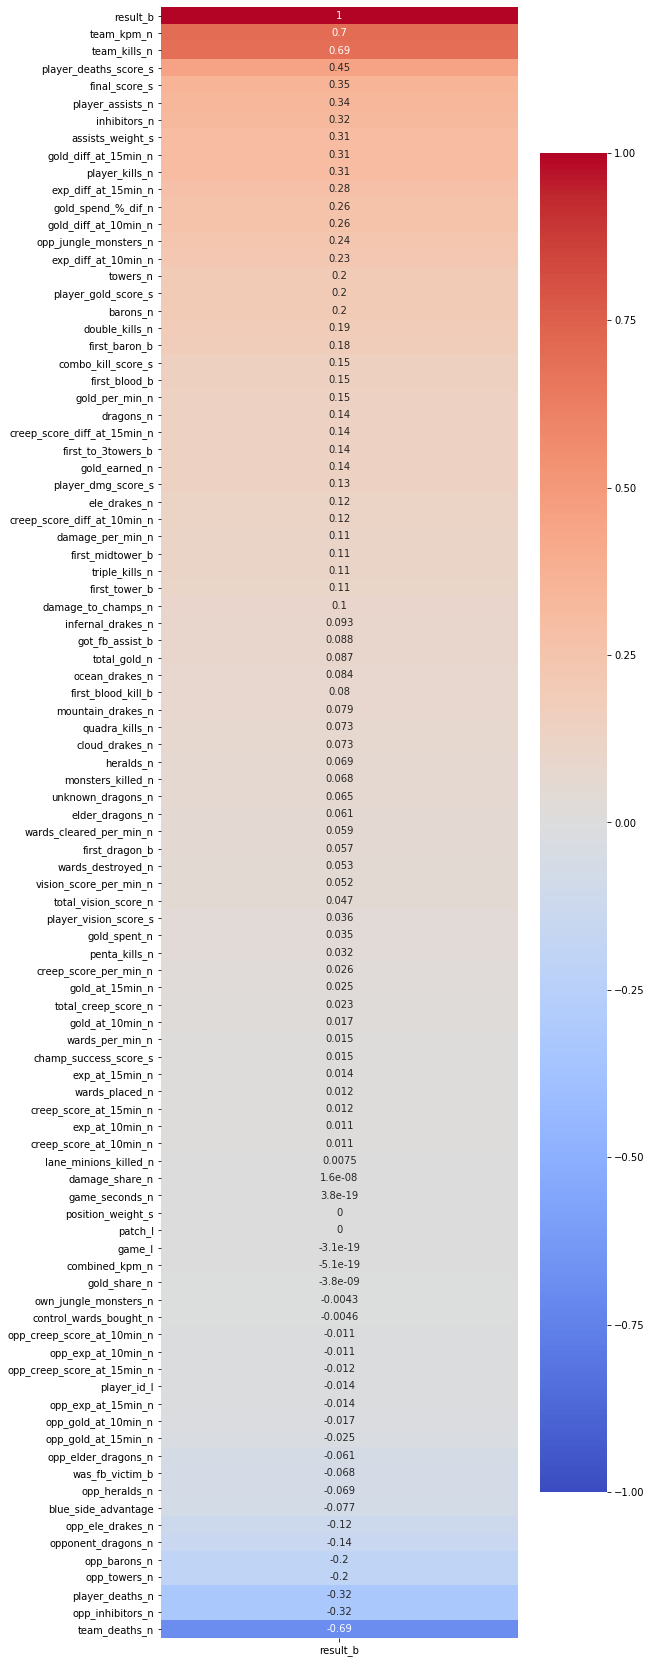

In [96]:
# Plot heatmap >>>
plt.figure(figsize=(8,30)) 
sns.heatmap(df.corr()[['result_b']].sort_values('result_b', ascending=False),
            annot=True,
            cmap = 'coolwarm',
            vmin = -1,
            vmax = 1);

In [97]:
# generalized linear model

# X = team_df.drop(columns='result_b')

# Set up your X and y columns >>>
X = df._get_numeric_data().drop(columns='result_b')
features = list(X.columns)
y = df['result_b']

# Train/ test split >>>
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=89)

ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)

# # Log our target >>>
# y_train_log = y_train.map(np.log)
# y_test_log = y_test.map(np.log)

# Instantiate models >>>
logreg = LogisticRegression(max_iter=10_000, C=1e9)  # C= inverse regularization str

# Cross val score >>>
logreg.fit(X_train_scaled, y_train)
# Train score
print('train', logreg.score(X_train_scaled, y_train))
# Test score
print('test', logreg.score(X_test_scaled, y_test))
# cross val score
print('cv', cross_val_score(logreg, X_train_scaled, y_train, cv=5).mean())

train 0.9837164750957854
test 0.9783176593521421
cv 0.978840033735868


In [98]:
y_hat = logreg.predict(X_test_scaled)
y_hat[0:40]

array([1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0], dtype=int64)

### Leagues: 

### Looks like we have 8 different leagues: 

- LPL (4284) - Tencent League of Legends Pro League (China)
- LCK (3000) - League of Legends Champions Korea (Korea)
- PCS (1584) - Pacific Championship Series (Pacific countries, thai, etc)
- LCS (1500) - League of Legends Championship Series (US)
- LEC (1452) - League of Legends European Championship (EU)
- LCS.A (1284) - League of Legends Championship Series .A ?  (US?)
- CBLOL (1116) - Campeonato Brasileiro de League of Legends (South America)
- TCL (1092) - Turkish Championship League (Turkey)